## **Pytorch linear regression tutorial**
## please first finish the tutorial and complete the exericses ##
Prof. Xiao. Edited after Christian Herta, Klaus Strohmenger at MIT. 

In [44]:
import torch 
import torch.nn as nn # main neural network
import torch.nn.functional as F
import torch.optim as optim # linear regression

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

##Hyper paramters

In [45]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

##Toy dataset

In [46]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


##Linear regression model
see examples of nn.Linear
https://pytorch.org/docs/stable/generated/torch.nn.Linear.html


In [47]:
model = nn.Linear(input_size, output_size)

# loss and optimizer 
nn.MSELoss(). is the least square loss. https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html

Optimizer
https://pytorch.org/docs/stable/optim.html


In [48]:
criterion = nn.MSELoss() # mean square error. 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

##Train the model 
See more tutorials on pytroch optimizer: https://pytorch.org/docs/master/optim.html#torch.optim.Optimizer.zero_grad
Here we optimize thee function step by step notice at each epoch the loss function value decreases. 

In [49]:
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train) # torch use tensors insted of array
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
# times goes on, loss will be less

Epoch [5/60], Loss: 1.4870
Epoch [10/60], Loss: 0.7739
Epoch [15/60], Loss: 0.4848
Epoch [20/60], Loss: 0.3675
Epoch [25/60], Loss: 0.3198
Epoch [30/60], Loss: 0.3003
Epoch [35/60], Loss: 0.2922
Epoch [40/60], Loss: 0.2887
Epoch [45/60], Loss: 0.2871
Epoch [50/60], Loss: 0.2863
Epoch [55/60], Loss: 0.2858
Epoch [60/60], Loss: 0.2854


#plot the results

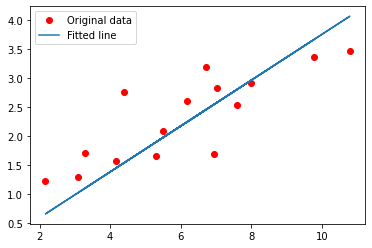

In [50]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

## Another Example and Exercise###
First, let us generate some training data:
Training data $D ={(x1,y1),(x2,y2),(x3,y3),,,}$
m = 100 training data. Two featres: x1,x2$\in$[1,0]. One target value: y = 1+2$x_1$+2$x_2$+$\eta$, gaussian noise $\eta$. Note in reality, we don't know the target function. 


In [51]:
### seed for reproducability
np.random.seed(42)

m = 100
n = 2

X = np.random.uniform(low=0, high=10, size=(m,n))

### convert from float64 to float32 for various reasons:
### speedup, less memory usage, precision is enough.
### when using GPU, fp16, fp32 or fp64 depends on
### type of GPU (consumer/workstation/server).
X = np.array(X, dtype=np.float32) 

print(X.shape)
print(X.dtype)

(100, 2)
float32


## define target function 

In [52]:
def true_target_function(x):
    t0 = 1
    t1 = 2
    t2 = 3
    noise = np.random.randn(len(x)) *5
    return t0 + t1 * x[:,0] + t2 * x[:,1] + noise
y = true_target_function(X)
y = np.array(y, dtype=np.float32)

print(y.shape)
print(y.dtype)

(100,)
float32


### plot the data

In [53]:
def plot_data_scatter(features, targets):
    """ Plots the features and the targets in a 3D scatter plot
    
    Args:
        features: 2D numpy-array features
        targets: ltargets
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(features[:,0], features[:,1], targets, c='r')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    return ax

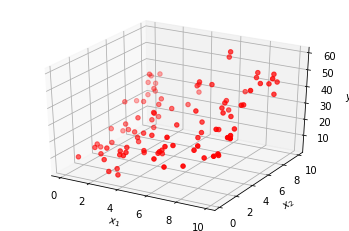

In [54]:
plot_data_scatter(X, y)

##Exercise - Multivariate Linear Regression##
We will only use two features in this notebook, so we are still able to plot them together with the target in a 3D plot. But your implementation should also be capable of handling more (except the plots).

A short recap, a hypothesis spaace $h_\theta(x)$
 is a certain function that we believe is similar to a target function that we like to model.

For PyTorch to be able to work with the data, we need to convert the numpy arrays.

In [55]:
### for pytorch, shape (m,1), 100x1 matrix, is crucial.
### shape (100), just a vector, can mess up calculations.
X_tensor = torch.from_numpy(X.reshape(m,n))
y_tensor = torch.from_numpy(y.reshape(m,1))

print(X.shape)
print(y.shape)
print(X_tensor.shape)
print(y_tensor.shape)

(100, 2)
(100,)
torch.Size([100, 2])
torch.Size([100, 1])


Define the Model
Task:
Implement the class LinearRegression, which uses torch.nn.Linear for our hypothesis.  h_$\theta$(x) = $\theta_0$+$\theta_1$$x_1$+....$\theta_n$$x_n$

In [56]:
#######################################
### Using built-in linear function ####
#######################################
class LinearRegression(nn.Module):  # inheriting from nn.Module!

    def __init__(self, n_features):
        super(LinearRegression, self).__init__()
        
        ###############################
        ##### YOUR SOLUTION START #####
        ###############################
        ##
        ## Task (1): add torch.nn.Linear as a class-member
        ##

        raise NotImplementedError()

        ###############################
        ##### YOUR SOLUTION End   #####
        ############################### 
        
    def forward(self, x):
        ###############################
        ##### YOUR SOLUTION START #####
        ###############################
        ##
        ## Task (2): call the member function on x and return the result
        ##

        raise NotImplementedError()

        ###############################
        ##### YOUR SOLUTION End   #####
        ############################### 
#######################################
### Using built-in linear function ####
#######################################

class LinearRegression(nn.Module):  ### inheriting from nn.Module!

    def __init__(self, n_features):
        super(LinearRegression, self).__init__()
        
        ###############################
        ##### YOUR SOLUTION START #####
        ###############################
        ##
        ## Task (1): add torch.nn.Linear as a class-member
        ##

        self.linear = nn.Linear(in_features=n_features, out_features=1)

        ###############################
        ##### YOUR SOLUTION End   #####
        ############################### 
        
    def forward(self, x):
        ###############################
        ##### YOUR SOLUTION START #####
        ###############################
        ##
        ## Task (2): call the member function on x and return the result
        ##

        return self.linear(x)

        ###############################
        ##### YOUR SOLUTION End   #####
        ############################### 


Now we can already make some predictions with our model.

In [57]:
### define model, generate predictions
NUM_FEATURES = n
model = LinearRegression(n_features=NUM_FEATURES)
y_predicted = model(X_tensor)

### output should look like:
### torch.Size([100, 1])
print(y_predicted.shape)

torch.Size([100, 1])


Training and Evaluation
Task:

Write the code to train your model:

Create a new model object before the training.
Scale your features before the training so they are in the range of -1 to +1*$X_{scaled} = \frac{X - \mu}{std(X)}$, 
IMPORTANT: Calculate the mean
$\mu$
 and the standard deviation $\sigma$ for each feature individually
 
Use the built-in for the Mean-Squared-Error loss torch.nn.MSELoss():

create an object once before the training, e.g. criterion = torch.nn.MSELoss()
calling it will give you a tensor, e.g. loss = criterion(y_tensor, predictions)
you an call backward() on that tensor too
Also use a built-in optimizer, e.g. torch.optim.Adam:

create an object once before the training providing your model.parameters() and a learning rate as argument
use its functions step() and zero_grad() to update the parameters, resp. to reset the gradient
Keep track of the costs in each epoch to plot them afterwards


In [58]:
### If we do not call figure() here, plot would go
### into the scatter plot some cells above 
### (reason [%matplotlib notebook] magic command)
plt.figure()

### Hyperparameters
learning_rate = 1
epochs = 1000
costs = []
mean = []
std = []



###############################
##### YOUR SOLUTION START #####
###############################
##
## Task (0): Scale your features
##
## Task (1): Iteratively train your model using the classes and functions mentioned
##
## Task (2): Plot the history of the costs afterwards
##

###############################
##### YOUR SOLUTION End   #####
###############################  


<Figure size 432x288 with 0 Axes>

Plot the decision boundary
Finally let us plot the decision hyperplane (just a plain plane here though) together with the data in a 3D plot.

Task:

Just make sure your trained model object is available in the context of the cell below and is called model.

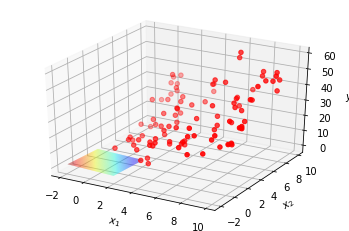

In [59]:
def plot_decision_bounday(X, mean, std, model, ax):
    g = 100
    x_1 = np.linspace((X[:,0].min()-1), (X[:,0].max()+1), g, dtype=np.float32)
    x_2 = np.linspace((X[:,1].min()-1), (X[:,1].max()+1), g, dtype=np.float32)

    ### IMPORTANT: As we trained our model with scaled X, we need to scale new data
    ### (here the grid IS new data) also with the same mean and std we already calculated
    x_1 = (x_1 - X.mean(axis=0)[0]) / X.std(axis=0)[0]
    x_2 = (x_2 - X.mean(axis=0)[1]) / X.std(axis=0)[1]

    
    X1, X2 = np.meshgrid(x_1, x_2)
    X_mesh = np.zeros((g**2,2), dtype=np.float32)
    X_mesh[:,0] = X1.flatten()
    X_mesh[:,1] = X2.flatten()
    Y = model(torch.tensor(X_mesh)).detach().numpy()
    ax.plot_surface(X1, X2, Y.reshape((g,g)), cmap=cm.jet, antialiased=True, shade=True, alpha=0.5, linewidth=0.)
    return ax
    

    
ax = plot_data_scatter(X_tensor, y_tensor)

### Here we pass our trained model into the function
plot_decision_bounday(X, mean, std, model, ax)

Summary and Outlook
During this exercise, the linear regression was extended to multidimensional feature space, here with two features only for visualization purpose. Though, handling even more features works exactly the same way.